In [1]:
# Installing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

In [2]:
# Loading the dataset
diabetes_dataset = pd.read_csv("diabetes.csv")
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Getting basic information about the dataset
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Checking the distribution of target variable
diabetes_dataset["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
# Analyzing the mean values of features based on the outcome
diabetes_dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


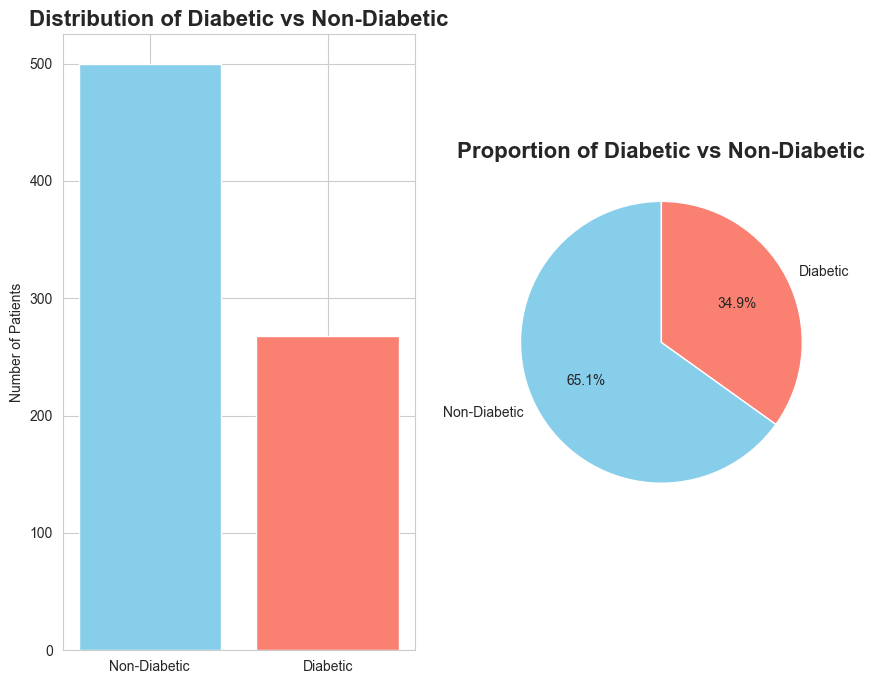

In [6]:
# Now we will visualize the data
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
outcome_counts = diabetes_dataset["Outcome"].value_counts()
plt.bar(["Non-Diabetic", "Diabetic"], outcome_counts.values, color=['skyblue', 'salmon'])
plt.title("Distribution of Diabetic vs Non-Diabetic", fontsize=16, fontweight='bold')
plt.ylabel("Number of Patients")
plt.subplot(1, 2, 2)
plt.pie(outcome_counts.values, labels=["Non-Diabetic", "Diabetic"], autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title("Proportion of Diabetic vs Non-Diabetic", fontsize=16, fontweight='bold')
plt.show()

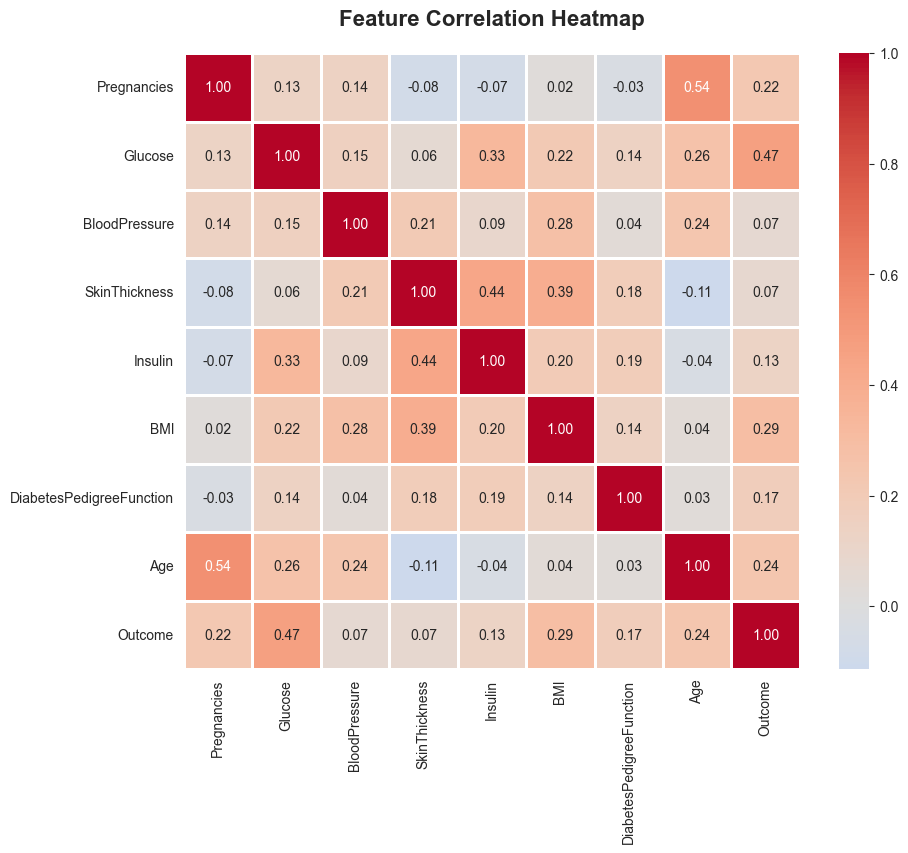

In [7]:
# Now we are going to make a corelation heatmap
plt.figure(figsize=(10, 8))
correlation = diabetes_dataset.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm',center=0,square=True, linewidths=1, fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=16, pad=20, fontweight='bold')
plt.show()

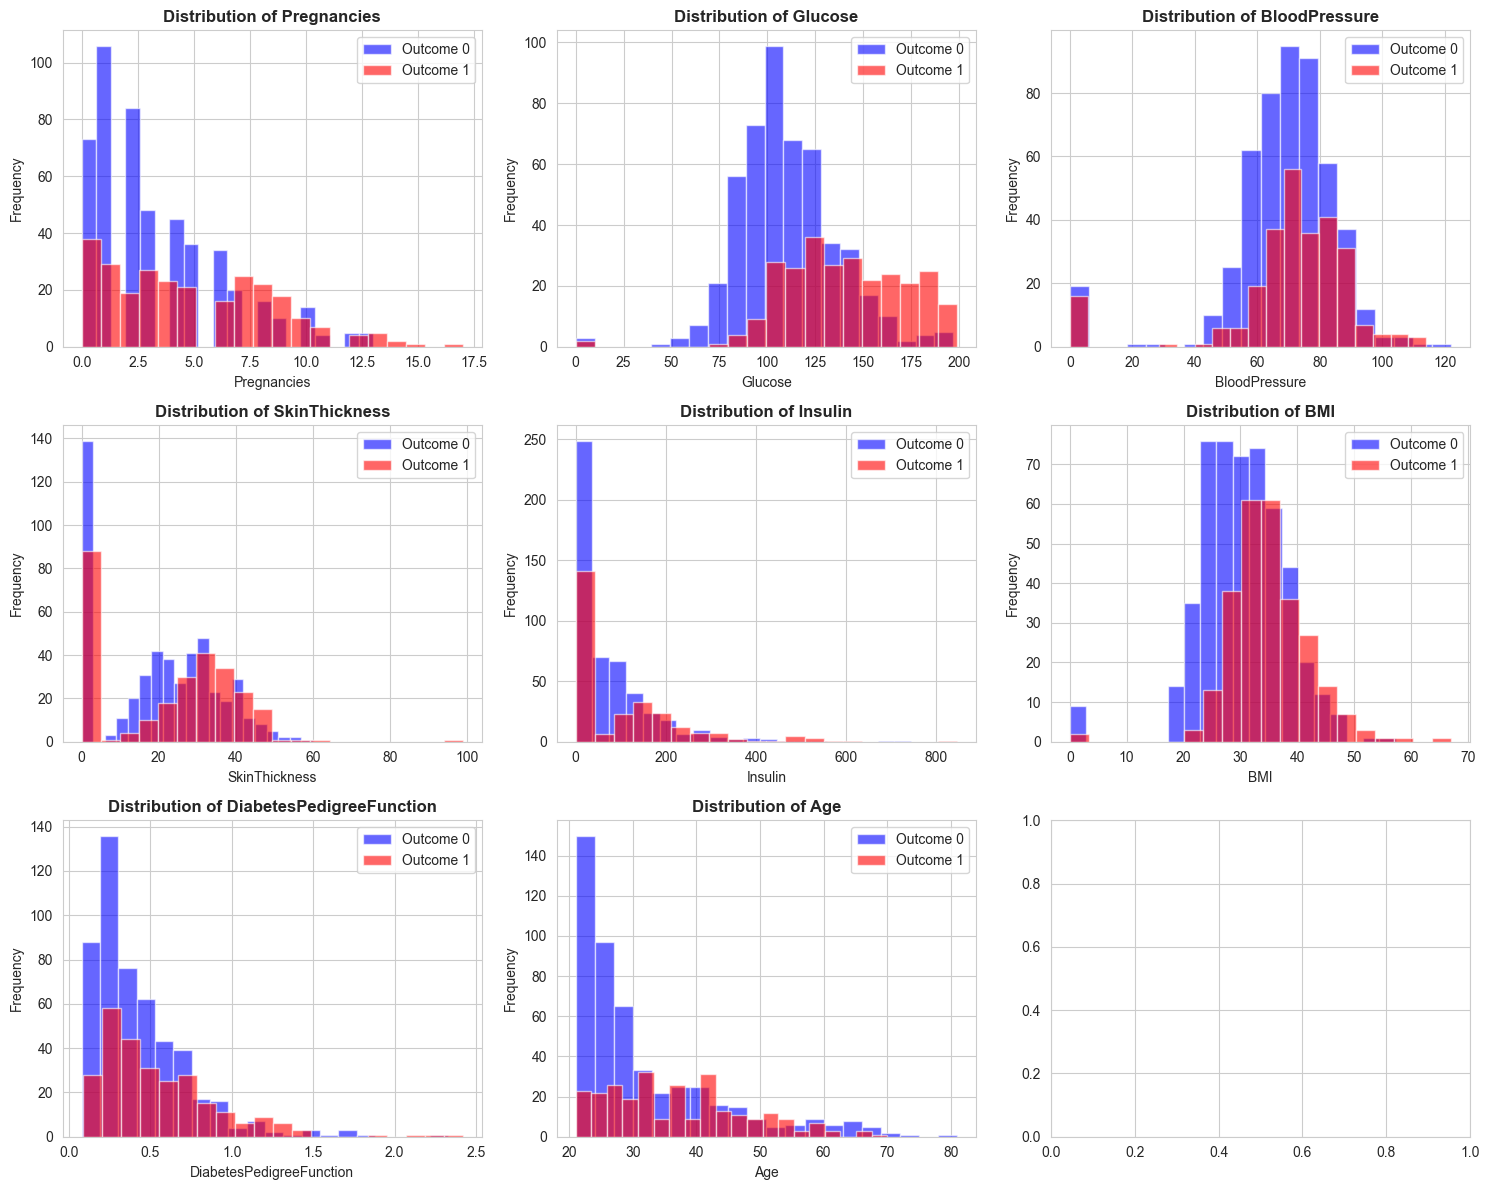

In [8]:
import matplotlib.pyplot as plt

# Create subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

features = diabetes_dataset.columns[:-1]

for idx, feature in enumerate(features):
    for outcome in [0, 1]:
        data = diabetes_dataset[diabetes_dataset["Outcome"] == outcome][feature]
        axes[idx].hist(
            data,
            bins=20,
            alpha=0.6,
            label=f"Outcome {outcome}",
            color=["blue", "red"][outcome]
        )

    axes[idx].set_title(f"Distribution of {feature}", fontsize=12, fontweight="bold")
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Frequency")
    axes[idx].legend()

plt.tight_layout()
plt.show()

In [9]:
# Data Preprocessing
X = diabetes_dataset.drop(columns="Outcome", axis=1)
y = diabetes_dataset["Outcome"]

In [10]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
# Standardizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [15]:
X_test

array([[-0.25095213, -0.46615631,  0.14964075, ..., -0.78595734,
        -0.79995787, -0.53102292],
       [-0.25095213, -0.24707629, -1.29789624, ..., -1.21748278,
        -1.00230582, -0.95646168],
       [ 0.3429808 ,  0.81702665,  0.45982725, ...,  0.2167047 ,
        -0.76673656,  2.7023117 ],
       ...,
       [-0.54791859, -0.34096773,  0.25303625, ...,  0.05170968,
         0.6829204 , -0.53102292],
       [-0.54791859, -1.24858494,  0.14964075, ..., -0.24020459,
         0.22688248, -0.70119842],
       [ 2.7187125 , -0.46615631,  0.14964075, ...,  0.58477051,
        -0.88754131,  1.00055664]])

In [16]:
X_train

array([[-1.14185152, -0.05929342, -3.57259724, ...,  0.05170968,
        -0.9992857 , -0.78628618],
       [ 0.63994726, -0.49745345,  0.04624525, ..., -0.15136112,
        -1.05666795,  0.31985461],
       [-0.84488505,  2.13150675, -0.47073225, ..., -0.24020459,
        -0.2231152 ,  2.19178518],
       ...,
       [ 2.12477957, -1.12339636,  0.25303625, ..., -0.24020459,
        -0.51908683,  0.14967911],
       [ 0.04601433, -0.27837344,  0.45982725, ...,  0.94014439,
        -0.71237443,  0.40494237],
       [-1.14185152, -1.09209922, -0.05715025, ...,  0.48323511,
        -0.70633419, -0.70119842]])

In [17]:
y_train

619    1
329    0
13     1
476    1
45     1
      ..
303    1
592    1
559    0
725    0
253    0
Name: Outcome, Length: 614, dtype: int64

In [18]:
y_test

615    0
80     0
148    0
132    1
501    0
      ..
127    0
185    1
85     0
497    0
86     0
Name: Outcome, Length: 154, dtype: int64

In [19]:
# Training the model by using SVM
classifier = svm.SVC(kernel='linear', probability=True)
classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [20]:
# Now test the trained model
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
training_data_accuracy

0.7866449511400652

In [21]:
# Now test the model on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
test_data_accuracy

0.7727272727272727

In [22]:
precision = precision_score(y_test, X_test_prediction)
recall = recall_score(y_test, X_test_prediction)
f1 = f1_score(y_test, X_test_prediction)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.7567567567567568
Recall: 0.5185185185185185
F1 Score: 0.6153846153846154


In [23]:
cm_score = confusion_matrix(y_test, X_test_prediction)
print("Confusion Matrix:")
print(cm_score)

Confusion Matrix:
[[91  9]
 [26 28]]


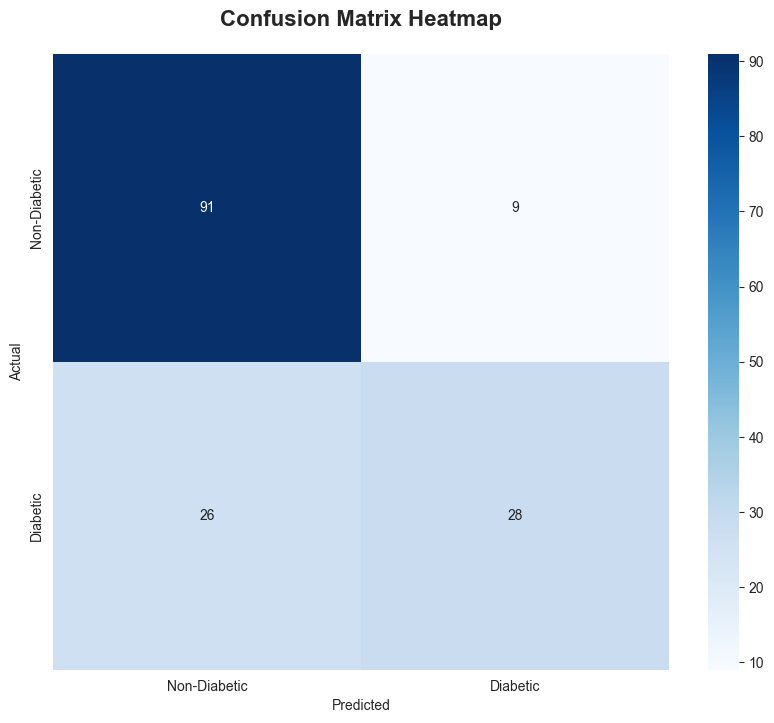

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_score, annot=True, fmt='d', cmap='Blues',square=True, xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title("Confusion Matrix Heatmap", fontsize=16, pad=20, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [25]:
# Now let's train a Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [28]:
X_train_prediction_rf = rf_classifier.predict(X_train)
X_train_prediction_rf

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [29]:
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, y_train)
training_data_accuracy_rf

1.0

In [30]:
X_test_prediction_rf = rf_classifier.predict(X_test)
test_data_accuracy_rf = accuracy_score(y_test, X_test_prediction_rf)

In [31]:
test_data_accuracy_rf

0.7272727272727273

In [32]:
precision_rf = precision_score(y_test, X_test_prediction_rf)
recall_rf = recall_score(y_test, X_test_prediction_rf)
f1_rf = f1_score(y_test, X_test_prediction_rf)

print(f"Precision score (Random Forest): {precision_rf}")
print(f"Recall score (Random Forest): {recall_rf}")
print(f"F1 score (Random Forest): {f1_rf}")

Precision score (Random Forest): 0.65
Recall score (Random Forest): 0.48148148148148145
F1 score (Random Forest): 0.553191489361702


In [33]:
cm_rf = confusion_matrix(y_test, X_test_prediction_rf)
print("Confusion Matrix (Random Forest):")
print(cm_rf)

Confusion Matrix (Random Forest):
[[86 14]
 [28 26]]


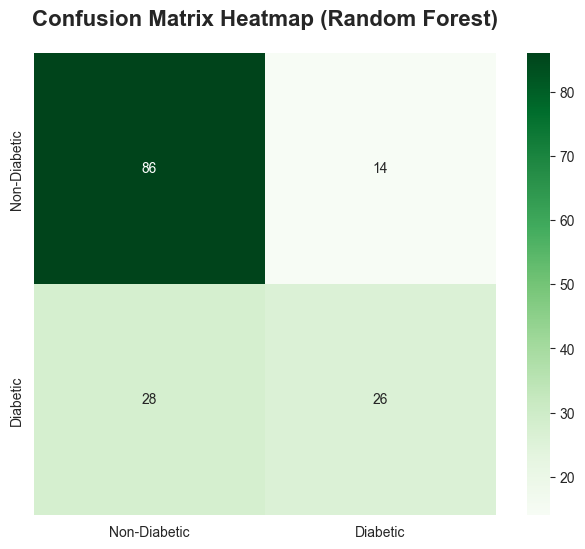

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', square=True, xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title("Confusion Matrix Heatmap (Random Forest)", fontsize=16, pad=20, fontweight='bold')
plt.show()

In [36]:
# now let's see which model is best 
print("SVM", test_data_accuracy)
print("Random Forest", test_data_accuracy_rf)

SVM 0.7727272727272727
Random Forest 0.7272727272727273


In [39]:
joblib.dump(classifier, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [38]:
# Now its time to predict diabetes in a person based on the input data
input_data = (5,166,72,19,175,25.8,0.587,51)
# changing the input data to numpy array
input_data_as_numpy_array = np.array(input_data)
# reshape the data as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
# standardize the input data
std_data = scaler.transform(input_data_reshaped)
prediction = classifier.predict(std_data)
prediction

array([1], dtype=int64)